In [1]:
from PIL import Image
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

In [2]:
def act(file_path: Path, df: pd.DataFrame):
    split_name = file_path.name.split("_", -1)
    species = str("".join(re.findall("[a-zA-Z]", split_name[0])))
    disease = split_name[2].split(".",1)[0]
    file = file_path.name
    image = Image.open(file_path)
    img_size = str(image.size[0]) + "," + str(image.size[1])
    
    if "train_set" in str(file_path):
        group = "train"
    elif "test_set" in str(file_path):
        group = "test"
    else:
        group = ""
    row = {"Plant": species 
           , "disease":disease
           , "size":img_size
           , "group": group
           , "FileName": file}
    df.loc[df.size] = row
    return df

def traverse_and_act(root_directory: str) -> pd.DataFrame:
    df = pd.DataFrame(columns=['Plant','disease','size','group','FileName'])
    path = Path(root_directory)
    for file_path in path.rglob("*"):
        if file_path.is_file():
            df = act(file_path, df)
    return df

In [3]:
image_details = traverse_and_act("/scratch/braines/Dataset/CCMT-Dataset-Augmented/")
#image_details.drop_duplicates(inplace=True)

In [4]:
image_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105252 entries, 0 to 526255
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Plant     105252 non-null  object
 1   disease   105252 non-null  object
 2   size      105252 non-null  object
 3   group     105252 non-null  object
 4   FileName  105252 non-null  object
dtypes: object(5)
memory usage: 4.8+ MB


In [4]:
image_details.head()

,Plant,disease,size,group,FileName
0,cashew,anthracnose,"400,400",,1001cashew_train_anthracnose.JPG
5,cashew,anthracnose,"400,400",,1002cashew_train_anthracnose.JPG
10,cashew,anthracnose,"400,400",,1000cashew_train_anthracnose.JPG
15,cashew,anthracnose,"400,400",,1003cashew_train_anthracnose.JPG
20,cashew,anthracnose,"400,400",,1006cashew_train_anthracnose.JPG


There appears to be a variation of the number of samples provided for each of the Species in the Augmented dataset

<Axes: xlabel='Plant'>

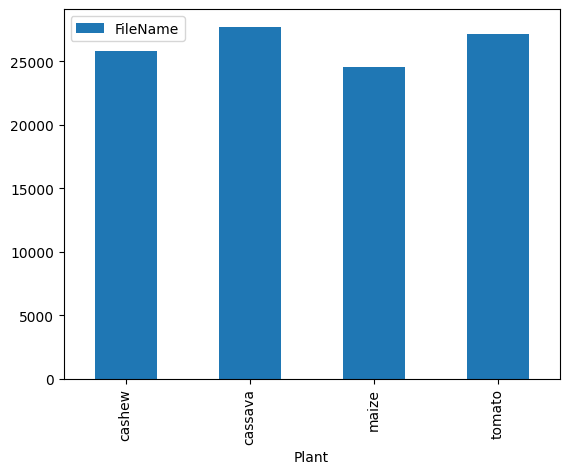

In [87]:
#Number of images per Species for train folders
image_details[['Plant','FileName']].groupby(['Plant']).nunique().plot.bar()

Splitting each plant out into the Species and Test or Train there appears to be a split ratio difference between some of the plants. Where Maize and Tomato have a 80:20 train-test split, Cashew and Cassava have a 73:27 train-test split.
There is also a train image number difference with the highest (Tomato) having 21723 images and the lowest (cashew) having 18910 Tomato has nearly 15% more images than cashew, this may impact the weighting in training the models

In [28]:
image_details[['Plant','group','FileName']].groupby(['Plant','group']).nunique()

FileName
Plant   group          
cashew  test       6901
        train     18910
cassava test       7510
        train     20212
maize   test       5125
        train     19426
tomato  test       5445
        train     21723

<Axes: xlabel='disease'>

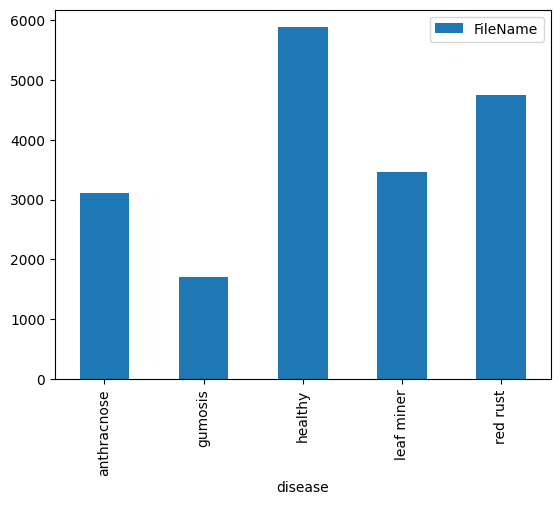

In [46]:
image_details[['disease','FileName']].where((image_details.Plant == 'cashew')& (image_details.group == 'train')).groupby(['disease']).nunique().plot.bar()

<Axes: xlabel='disease'>

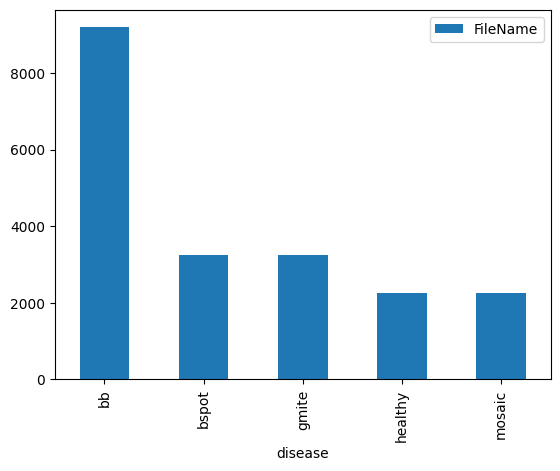

In [47]:
image_details[['disease','FileName']].where((image_details.Plant == 'cassava')& (image_details.group == 'train')).groupby(['disease']).nunique().plot.bar()

<Axes: xlabel='disease'>

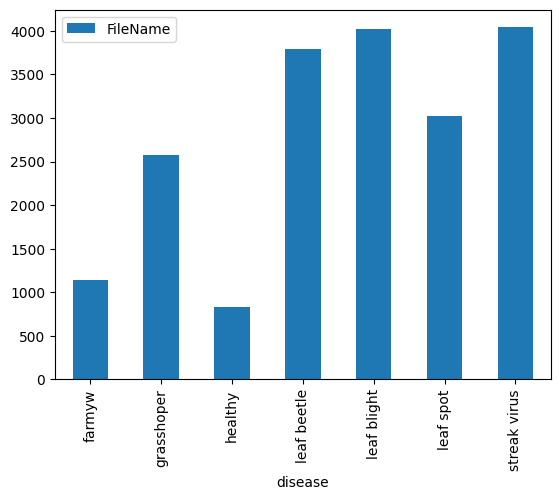

In [48]:
image_details[['disease','FileName']].where((image_details.Plant == 'maize')& (image_details.group == 'train')).groupby(['disease']).nunique().plot.bar()

<Axes: xlabel='disease'>

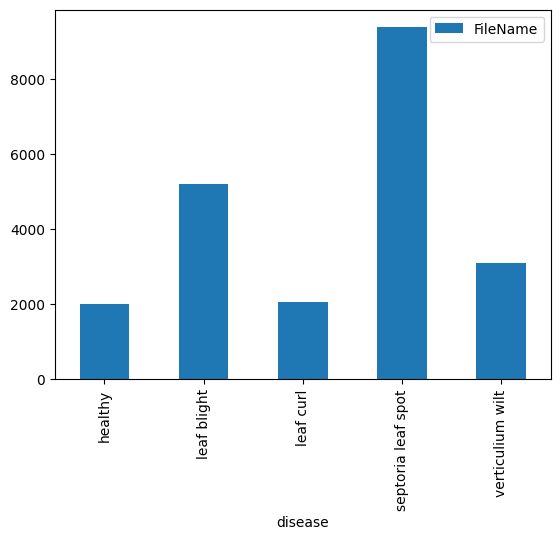

In [49]:
image_details[['disease','FileName']].where((image_details.Plant == 'tomato')& (image_details.group == 'train')).groupby(['disease']).nunique().plot.bar()

In [91]:
image_details['size'].unique()

array(['400,400', '223,290', '160,245', '283,333', '379,332', '235,323',
       '269,391', '400,302', '340,297', '235,320', '382,293', '276,384',
       '360,240', '356,299', '369,292', '355,260', '370,285', '206,328',
       '383,271', '204,281', '279,334', '269,352', '289,335', '239,309',
       '264,337', '211,306', '263,350', '278,209', '364,249', '344,230',
       '355,239', '318,259', '304,235', '307,258', '358,263', '365,322',
       '355,311', '333,318', '400,274', '369,262', '276,206', '400,314',
       '321,261', '315,232', '230,274', '251,247', '317,267', '194,275',
       '369,296', '358,310', '400,335', '355,400', '400,337', '294,258',
       '191,333', '227,298', '288,238', '292,269', '239,217', '311,260',
       '308,222', '263,257', '400,312', '289,210', '272,203', '400,318',
       '375,317', '244,214', '312,261', '400,292', '327,291', '289,291',
       '324,239', '343,254', '293,322', '313,234', '346,312', '337,234',
       '354,321', '93,107', '188,184'], dtype=objec

In [5]:
image_details[['disease','Plant','FileName']].groupby(['disease','Plant']).nunique()

FileName
disease            Plant            
anthracnose        cashew       4940
bb                 cassava     11818
bspot              cassava      4733
farmyw             maize        1424
gmite              cassava      4266
grasshoper         maize        2986
gumosis            cashew       2139
healthy            cashew       7213
                   cassava      3455
                   maize        1041
                   tomato       2500
leaf beetle        maize        4739
leaf blight        maize        5029
                   tomato       6509
leaf curl          tomato       2582
leaf miner         cashew       4953
leaf spot          maize        4285
mosaic             cassava      3450
red rust           cashew       6566
septoria leaf spot tomato      11713
streak virus       maize        5047
verticulium wilt   tomato       3864